### `jupyter notebook` for the `T-LSTM.py` example

Modified from the [`T-LSTM`](https://github.com/illidanlab/T-LSTM/blob/master/main_AE.py) repo

Import the required packages. Note that this notebook uses the autoencode example.

In [1]:
# A toy example for clustering with 2-layer TLSTM auto-encoder
# Inci M. Baytas, 2017
# How to run: Directly run the main file: python main_AE.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import h5py

from T_LSTM_AE import T_LSTM_AE

Take a quick look at the data set

In [2]:
cluster_data = h5py.File('../data/Clustering_Data_1D.mat')
print(list(cluster_data.keys()))

for item in cluster_data.keys():
    print(cluster_data[item])

[u'#refs#', u'Assign', u'Data', u'Time']
<HDF5 group "/#refs#" (16 members)>
<HDF5 dataset "Assign": shape (1, 5), type "|O">
<HDF5 dataset "Data": shape (1, 5), type "|O">
<HDF5 dataset "Time": shape (1, 5), type "|O">


Import the data set

In [3]:
# A synthetic data

Data = []
Time = []
Assignments = []
Target = []
with h5py.File("../data/Clustering_Data_1D.mat") as f:#
    for column in f['Data']:
        row_data = []
        for row_number in range(len(column)):
            row_data.append(f[column[row_number]][:])
    Data.append(row_data)
    for column in f['Time']:
        row_data = []
        for row_number in range(len(column)):
            row_data.append(f[column[row_number]][:])
    Time.append(row_data)
    for column in f['Assign']:
        row_data = []
        for row_number in range(len(column)):
            row_data.append(f[column[row_number]][:])
    Assignments.append(row_data)

cell_len = len(Data[0])

Investigate the data

In [4]:
print(type(Data)) # The data object is a list
print(len(Data))
#print(Data) 

<type 'list'>
1


Create a function to generate batches of data

In [5]:
def generate_batches(data, time, assign, index):
    batch_data = np.transpose(data[0][index])
    batch_time = np.transpose(time[0][index])
    batch_assign = np.transpose(assign[0][index])
    return batch_data, batch_time, batch_assign

Set model parameters

In [6]:
# set learning parameters
learning_rate = 1e-3
ae_iters = 2000 #Number of iterations (epochs)

# set network parameters
input_dim = np.size(Data[0][0], 0)
hidden_dim = 8
hidden_dim2 = 2
hidden_dim3 = 8
output_dim = hidden_dim
output_dim2 = hidden_dim2
output_dim3 = input_dim

Create the model, set the loss function, optimizer, and initialize

In [7]:
lstm_ae = T_LSTM_AE(input_dim, output_dim, output_dim2, output_dim3, hidden_dim, hidden_dim2, hidden_dim3)

loss_ae = lstm_ae.get_reconstruction_loss()

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss_ae)

init = tf.global_variables_initializer()

Run the model

In [8]:
with tf.Session() as sess:
    sess.run(init)
    Loss = np.zeros(ae_iters)
    for i in range(ae_iters):
        Ll = 0
        for j in range(cell_len):
            x, t, a = generate_batches(Data, Time, Assignments, j)
            _, L = sess.run([optimizer, loss_ae], feed_dict = {lstm_ae.input: x, lstm_ae.time: t})
            Ll += L
        Loss[i] = Ll / cell_len
        print('Loss: %f' %(Loss[i]))

    assign_truth = []
    data_reps = []
    for c in range(cell_len):
        data = np.transpose(Data[0][c])
        time = np.transpose(Time[0][c])
        assign = np.transpose(Assignments[0][c])
        reps, cells = sess.run(lstm_ae.get_representation(), feed_dict = {lstm_ae.input: data, lstm_ae.time: time})
        if c == 0:
            data_reps = reps
            assign_truth = assign
        else:
            data_reps = np.concatenate((data_reps, reps))
            assign_truth = np.concatenate((assign_truth, assign))

Loss: 326.614603
Loss: 326.311670
Loss: 326.008923
Loss: 325.704449
Loss: 325.396164
Loss: 325.081308
Loss: 324.756427
Loss: 324.417303
Loss: 324.058899
Loss: 323.675363
Loss: 323.260019
Loss: 322.804779
Loss: 322.298993
Loss: 321.729022
Loss: 321.070102
Loss: 320.261560
Loss: 319.103720
Loss: 316.927057
Loss: 314.692477
Loss: 313.329672
Loss: 312.021729
Loss: 310.679477
Loss: 309.285568
Loss: 307.835321
Loss: 306.330542
Loss: 304.776852
Loss: 303.181824
Loss: 301.554025
Loss: 299.903528
Loss: 298.237561
Loss: 296.562381
Loss: 294.882358
Loss: 293.201443
Loss: 291.522052
Loss: 289.846063
Loss: 288.174429
Loss: 286.507492
Loss: 284.844913
Loss: 283.185712
Loss: 281.528326
Loss: 279.870679
Loss: 278.210446
Loss: 276.546042
Loss: 274.878598
Loss: 273.214362
Loss: 271.562683
Loss: 269.943115
Loss: 268.358188
Loss: 266.811038
Loss: 265.296609
Loss: 263.814856
Loss: 262.363574
Loss: 260.936920
Loss: 259.533423
Loss: 258.179001
Loss: 256.838480
Loss: 255.510483
Loss: 254.202826
Loss: 252.9226

Loss: 72.087283
Loss: 71.910670
Loss: 71.728432
Loss: 71.551403
Loss: 71.383017
Loss: 71.216467
Loss: 71.051176
Loss: 70.895428
Loss: 70.735477
Loss: 70.552137
Loss: 70.372292
Loss: 70.219707
Loss: 70.072591
Loss: 69.897095
Loss: 69.749706
Loss: 69.618581
Loss: 69.417273
Loss: 69.220690
Loss: 69.103007
Loss: 68.933291
Loss: 68.714128
Loss: 68.558323
Loss: 68.367696
Loss: 68.182939
Loss: 68.020085
Loss: 67.854872
Loss: 67.694360
Loss: 67.534912
Loss: 67.370480
Loss: 67.205244
Loss: 67.042530
Loss: 66.881931
Loss: 66.723414
Loss: 66.567062
Loss: 66.410842
Loss: 66.252103
Loss: 66.091258
Loss: 65.930984
Loss: 65.772130
Loss: 65.615160
Loss: 65.462369
Loss: 65.313212
Loss: 65.162182
Loss: 65.006326
Loss: 64.848628
Loss: 64.691844
Loss: 64.534512
Loss: 64.378618
Loss: 64.235258
Loss: 64.100757
Loss: 63.957482
Loss: 63.805440
Loss: 63.655586
Loss: 63.510699
Loss: 63.356251
Loss: 63.188557
Loss: 63.056923
Loss: 62.936047
Loss: 62.787950
Loss: 62.634410
Loss: 62.486076
Loss: 62.355737
Loss: 62

Loss: 19.937991
Loss: 20.106374
Loss: 19.977114
Loss: 19.808977
Loss: 19.745293
Loss: 19.722482
Loss: 19.900511
Loss: 19.675684
Loss: 19.585499
Loss: 19.478837
Loss: 19.570855
Loss: 19.600922
Loss: 19.368862
Loss: 19.317212
Loss: 19.218243
Loss: 19.378873
Loss: 19.215964
Loss: 19.090013
Loss: 18.983535
Loss: 19.013165
Loss: 19.062833
Loss: 18.868313
Loss: 18.790213
Loss: 18.701075
Loss: 18.835663
Loss: 18.773176
Loss: 18.587718
Loss: 18.516996
Loss: 18.477811
Loss: 18.667801
Loss: 18.496775
Loss: 18.358619
Loss: 18.272871
Loss: 18.328210
Loss: 18.459514
Loss: 18.205742
Loss: 18.144464
Loss: 18.030474
Loss: 18.232068
Loss: 18.123377
Loss: 17.950159
Loss: 17.851080
Loss: 17.852089
Loss: 17.957863
Loss: 17.748775
Loss: 17.658805
Loss: 17.561164
Loss: 17.692089
Loss: 17.613293
Loss: 17.447557
Loss: 17.360018
Loss: 17.348560
Loss: 17.493288
Loss: 17.322845
Loss: 17.199537
Loss: 17.111642
Loss: 17.193750
Loss: 17.304495
Loss: 17.065448
Loss: 16.991955
Loss: 16.891119
Loss: 17.092202
Loss: 17

Loss: 5.393986
Loss: 5.395871
Loss: 5.472912
Loss: 5.452054
Loss: 5.405854
Loss: 5.347333
Loss: 5.333269
Loss: 5.425344
Loss: 5.413004
Loss: 5.364598
Loss: 5.304105
Loss: 5.274659
Loss: 5.378449
Loss: 5.374545
Loss: 5.323819
Loss: 5.260140
Loss: 5.222236
Loss: 5.334497
Loss: 5.333264
Loss: 5.281254
Loss: 5.210564
Loss: 5.177295
Loss: 5.293789
Loss: 5.285748
Loss: 5.232387
Loss: 5.152078
Loss: 5.141532
Loss: 5.250770
Loss: 5.230339
Loss: 5.170860
Loss: 5.087346
Loss: 5.114068
Loss: 5.196933
Loss: 5.167076
Loss: 5.095177
Loss: 5.026765
Loss: 5.086002
Loss: 5.131673
Loss: 5.095027
Loss: 5.015304
Loss: 4.978155
Loss: 5.047979
Loss: 5.063662
Loss: 5.017975
Loss: 4.943781
Loss: 4.937977
Loss: 5.001747
Loss: 4.999144
Loss: 4.945717
Loss: 4.883619
Loss: 4.899856
Loss: 4.954028
Loss: 4.939670
Loss: 4.882688
Loss: 4.830983
Loss: 4.861846
Loss: 4.908516
Loss: 4.885742
Loss: 4.827278
Loss: 4.782136
Loss: 4.824460
Loss: 4.866213
Loss: 4.837109
Loss: 4.776955
Loss: 4.735291
Loss: 4.788572
Loss: 4.82

Text(0.5,1,'TLSTM')

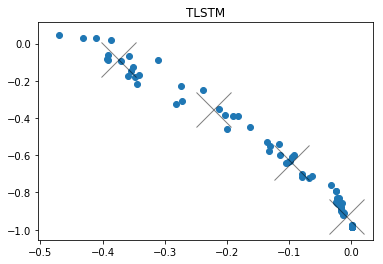

In [9]:
######## Clustering ##########################
kmeans = KMeans(n_clusters = 4, random_state = 0, init = 'k-means++').fit(data_reps)
centroid_values = kmeans.cluster_centers_

#plt.figure(1)
plt.scatter(data_reps[:, 0], data_reps[:, 1])
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize = 35, alpha = 0.5)
#, c = assign_truth, s = 50, I had to remove this code from the above line because it does not work in matplotlib 2.2.3
plt.title('TLSTM')
#plt.show()

In [ ]:
#print(assign_truth)